In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [10]:
news_tables = {}
tickers = ['NVDA']#,'AMZN','NKE','TM','AVGO','DIS']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table
    
#print(html)
print(news_table)

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">May-17-22 05:17PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2022/05/17/why-nvidia-stock-shot-higher-on-tuesday/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">Why Nvidia Stock Shot Higher on Tuesday</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span> <span class="body-table-news-gain">+5.29%</span></div></div></td></tr>
<tr><td align="right" width="130">04:15PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/video/nasdaq-leads-gains-market-close-201556157.html" target="_blank">Nasdaq leads gains into market close, W

In [15]:
# Read one single day of headlines for 'AMZN' 
target = news_tables['NVDA']

# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
target_tr = target.findAll('tr')
#print(target_tr)
for i, table_row in enumerate(target_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 5000:
        break

Why Nvidia Stock Shot Higher on Tuesday
May-17-22 05:17PM  
Nasdaq leads gains into market close, Walmart stock plunges in worst day since 1987
04:15PM  
3 Beaten Down Tech Stocks Trading at Attractive Buying Levels
03:15PM  
2 Top Metaverse Stocks Ready for a Bull Run
11:29AM  
The Zacks Analyst Blog Highlights NVIDIA, The Home Depot, Pfizer, The Walt Disney, and Salesforce
11:27AM  
Top Millennial, Gen Z Stock Picks Shift To Energy Stocks; Top Pick Tesla Takes A Hit
10:38AM  
Tech Market Sell-Off: 4 Stocks Down Big That Are Long-Term Holds
10:27AM  
Market check: Stocks rally, gas futures hit record high
10:27AM  
Its so horrible that I want to buy it  Jim Cramer likes these 2 beaten-down tech names that are still posting white-hot revenue growth
10:04AM  
Stocks climb as retail earnings roll in, meme stocks gain
09:56AM  
Gaming: Take-Two reports mixed earnings, stock jumps
09:53AM  
BlackRocks Latest Portfolio 2022: Top 10 Stock Picks
09:38AM  
$300 a Month in These 3 Stocks Could 

In [12]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['NVDA', 'May-17-22', '05:17PM', 'Why Nvidia Stock Shot Higher on Tuesday'],
 ['NVDA',
  'May-17-22',
  '04:15PM',
  'Nasdaq leads gains into market close, Walmart stock plunges in worst day since 1987'],
 ['NVDA',
  'May-17-22',
  '03:15PM',
  '3 Beaten Down Tech Stocks Trading at Attractive Buying Levels'],
 ['NVDA',
  'May-17-22',
  '11:29AM',
  '2 Top Metaverse Stocks Ready for a Bull Run'],
 ['NVDA',
  'May-17-22',
  '11:27AM',
  'The Zacks Analyst Blog Highlights NVIDIA, The Home Depot, Pfizer, The Walt Disney, and Salesforce'],
 ['NVDA',
  'May-17-22',
  '10:38AM',
  'Top Millennial, Gen Z Stock Picks Shift To Energy Stocks; Top Pick Tesla Takes A Hit'],
 ['NVDA',
  'May-17-22',
  '10:27AM',
  'Tech Market Sell-Off: 4 Stocks Down Big That Are Long-Term Holds'],
 ['NVDA',
  'May-17-22',
  '10:27AM',
  'Market check: Stocks rally, gas futures hit record high'],
 ['NVDA',
  'May-17-22',
  '10:04AM',
  'Its so horrible that I want to buy it  Jim Cramer likes these 2 beaten-down tec

In [5]:
import nltk
#nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,NVDA,2022-05-17,05:17PM,Why Nvidia Stock Shot Higher on Tuesday,0.000,1.000,0.000,0.0000
1,NVDA,2022-05-17,04:15PM,"Nasdaq leads gains into market close, Walmart ...",0.222,0.649,0.130,-0.4019
2,NVDA,2022-05-17,03:15PM,3 Beaten Down Tech Stocks Trading at Attractiv...,0.220,0.551,0.228,0.0258
3,NVDA,2022-05-17,11:29AM,2 Top Metaverse Stocks Ready for a Bull Run,0.000,0.538,0.462,0.5106
4,NVDA,2022-05-17,11:27AM,"The Zacks Analyst Blog Highlights NVIDIA, The ...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
595,DIS,2022-05-11,02:21PM,Fitch Ratings sheds more light on Reedy Creek ...,0.383,0.617,0.000,-0.7351
596,DIS,2022-05-11,01:47PM,"Disney Should Buy Netflix or Roblox, Says Anal...",0.000,1.000,0.000,0.0000
597,DIS,2022-05-11,01:26PM,Carnival CEO on summer travel season: Prices a...,0.000,0.712,0.288,0.7684
598,DIS,2022-05-11,12:28PM,Could The The Walt Disney Company (NYSE:DIS) O...,0.000,0.805,0.195,0.4404


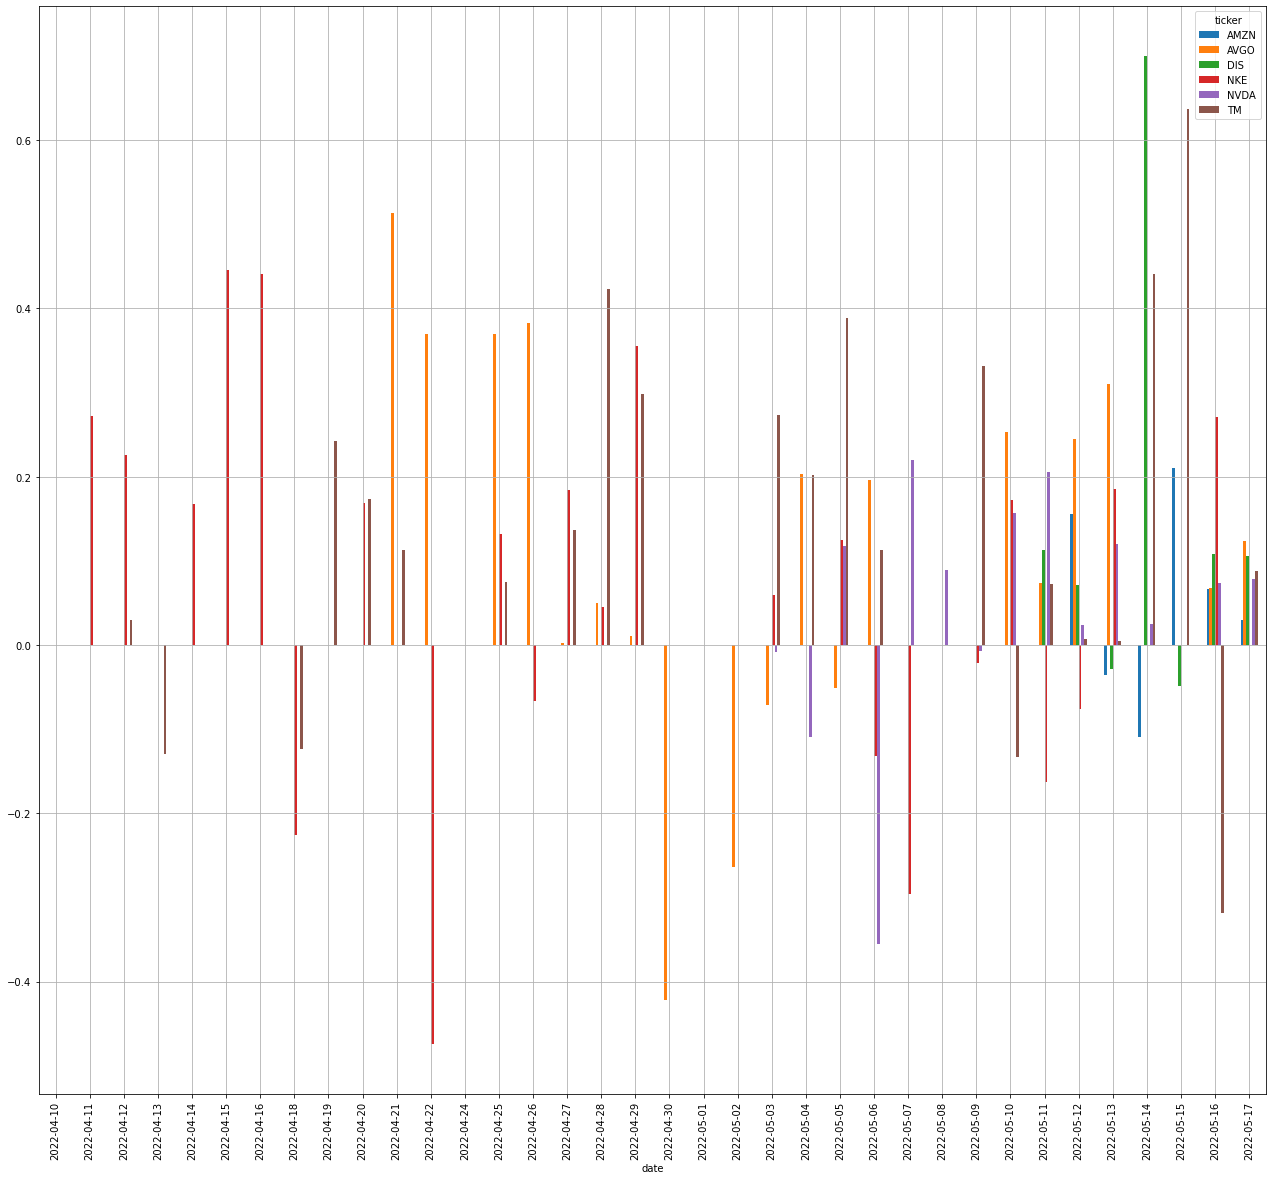

In [6]:
plt.rcParams['figure.figsize'] = [22, 20]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()